In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [175]:
df=pd.read_csv('mmALL_073120_csv.csv')
df

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,15.0,7.0,2017.0,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...
17141,9102017003,Papua New Guinea,910,2017,Oceania,1,3,31.0,10.0,2017.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,refugees dig in as camp closes; manus situatio...,refugees on manus island were braced for poten...
17142,9102018000,Papua New Guinea,910,2018,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17143,9102019000,Papua New Guinea,910,2019,Oceania,0,0,NaN,NaN,NaN,...,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN


In [176]:
nan_counts_per_column = df.isna().sum()
nan_counts_per_column

id                           0
country                      0
ccode                        0
year                         0
region                       0
protest                      0
protestnumber                0
startday                  1906
startmonth                1906
startyear                 1906
endday                    1906
endmonth                  1906
endyear                   1906
protesterviolence         1387
location                  1927
participants_category     7258
participants              1399
protesteridentity         2461
protesterdemand1          1907
protesterdemand2         14168
protesterdemand3         16762
protesterdemand4         16314
stateresponse1            1937
stateresponse2           14257
stateresponse3           16215
stateresponse4           16901
stateresponse5           16296
stateresponse6           17129
stateresponse7           16225
sources                   1910
notes                     1952
dtype: int64

In [177]:
nan_counts_df = nan_counts_per_column.to_frame()


print(nan_counts_df.to_string())


                           0
id                         0
country                    0
ccode                      0
year                       0
region                     0
protest                    0
protestnumber              0
startday                1906
startmonth              1906
startyear               1906
endday                  1906
endmonth                1906
endyear                 1906
protesterviolence       1387
location                1927
participants_category   7258
participants            1399
protesteridentity       2461
protesterdemand1        1907
protesterdemand2       14168
protesterdemand3       16762
protesterdemand4       16314
stateresponse1          1937
stateresponse2         14257
stateresponse3         16215
stateresponse4         16901
stateresponse5         16296
stateresponse6         17129
stateresponse7         16225
sources                 1910
notes                   1952


In [178]:
unique_responses = pd.Series(pd.concat([df['stateresponse1'], df['stateresponse2'], df['stateresponse3'], df['stateresponse4'], df['stateresponse5'], df['stateresponse6'], df['stateresponse7']], axis=0).unique())

unique_responses


0             ignore
1       accomodation
2    crowd dispersal
3            arrests
4          shootings
5                NaN
6           beatings
7           killings
8                  .
dtype: object

In [179]:
def categorize_deadly_force(value):
    if value in ['shootings', 'beatings', 'killings']:
        return 'deadly force'
    return value

stateresponse_cols = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7']
df[stateresponse_cols] = df[stateresponse_cols].applymap(categorize_deadly_force)

In [180]:
unique_responses = pd.Series(pd.concat([df['stateresponse1'], df['stateresponse2'], df['stateresponse3'], df['stateresponse4'], df['stateresponse5'], df['stateresponse6'], df['stateresponse7']], axis=0).unique())
unique_responses

0             ignore
1       accomodation
2    crowd dispersal
3            arrests
4       deadly force
5                NaN
6                  .
dtype: object

In [181]:
df['protest'].value_counts(dropna=False)

protest
1    15239
0     1906
Name: count, dtype: int64

In [182]:
df.dtypes

id                         int64
country                   object
ccode                      int64
year                       int64
region                    object
protest                    int64
protestnumber              int64
startday                 float64
startmonth               float64
startyear                float64
endday                   float64
endmonth                 float64
endyear                  float64
protesterviolence        float64
location                  object
participants_category     object
participants              object
protesteridentity         object
protesterdemand1          object
protesterdemand2          object
protesterdemand3          object
protesterdemand4          object
stateresponse1            object
stateresponse2            object
stateresponse3            object
stateresponse4            object
stateresponse5            object
stateresponse6            object
stateresponse7            object
sources                   object
notes     

In [183]:
df = df[df['protest'] != 0]
df.shape

(15239, 31)

In [184]:
selected_columns = df[['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear']]
selected_columns

,startday,startmonth,startyear,endday,endmonth,endyear
0,15.0,1.0,1990.0,15.0,1.0,1990.0
1,25.0,6.0,1990.0,25.0,6.0,1990.0
2,1.0,7.0,1990.0,1.0,7.0,1990.0
3,12.0,7.0,1990.0,6.0,9.0,1990.0
4,14.0,8.0,1990.0,15.0,8.0,1990.0
...,...,...,...,...,...,...
17136,16.0,2.0,2014.0,18.0,2.0,2014.0
17138,15.0,5.0,2016.0,9.0,6.0,2016.0
17139,15.0,6.0,2017.0,15.0,6.0,2017.0
17140,15.0,7.0,2017.0,15.0,7.0,2017.0


In [185]:
df = df.dropna(subset=['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear'])

In [186]:
nan_counts_date_columns = df[['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear']].isna().sum()
nan_counts_date_columns

startday      0
startmonth    0
startyear     0
endday        0
endmonth      0
endyear       0
dtype: int64

In [187]:
date_columns = ['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear']
df[date_columns] = df[date_columns].astype(int)
df

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15,1,1990,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25,6,1990,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1,7,1990,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12,7,1990,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14,8,1990,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,9102014001,Papua New Guinea,910,2014,Oceania,1,1,16,2,2014,...,NaN,crowd dispersal,deadly force,NaN,NaN,NaN,NaN,NaN,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,15,5,2016,...,NaN,deadly force,deadly force,crowd dispersal,NaN,NaN,NaN,NaN,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
17139,9102017001,Papua New Guinea,910,2017,Oceania,1,1,15,6,2017,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,15,7,2017,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...


In [188]:
df['start_date'] = pd.to_datetime({'year': df['startyear'], 'month': df['startmonth'], 'day': df['startday']})
df['end_date'] = pd.to_datetime({'year': df['endyear'], 'month': df['endmonth'], 'day': df['endday']})
df

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,start_date,end_date
0,201990001,Canada,20,1990,North America,1,1,15,1,1990,...,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,1990-01-15,1990-01-15
1,201990002,Canada,20,1990,North America,1,2,25,6,1990,...,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,1990-06-25,1990-06-25
2,201990003,Canada,20,1990,North America,1,3,1,7,1990,...,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01
3,201990004,Canada,20,1990,North America,1,4,12,7,1990,...,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06
4,201990005,Canada,20,1990,North America,1,5,14,8,1990,...,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,1990-08-14,1990-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,9102014001,Papua New Guinea,910,2014,Oceania,1,1,16,2,2014,...,deadly force,NaN,NaN,NaN,NaN,NaN,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...,2014-02-16,2014-02-18
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,15,5,2016,...,deadly force,crowd dispersal,NaN,NaN,NaN,NaN,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...,2016-05-15,2016-06-09
17139,9102017001,Papua New Guinea,910,2017,Oceania,1,1,15,6,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...,2017-06-15,2017-06-15
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,15,7,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...,2017-07-15,2017-07-15


In [189]:
df.dtypes

id                                int64
country                          object
ccode                             int64
year                              int64
region                           object
protest                           int64
protestnumber                     int64
startday                          int32
startmonth                        int32
startyear                         int32
endday                            int32
endmonth                          int32
endyear                           int32
protesterviolence               float64
location                         object
participants_category            object
participants                     object
protesteridentity                object
protesterdemand1                 object
protesterdemand2                 object
protesterdemand3                 object
protesterdemand4                 object
stateresponse1                   object
stateresponse2                   object
stateresponse3                   object


In [190]:
# Drop the original date columns
df = df.drop(['startyear', 'startmonth', 'startday', 'endyear', 'endmonth', 'endday'], axis=1)

# new column order, placing 'start_date' and 'end_date' after 'protestnumber'
column_order = [col for col in df.columns if col not in ('start_date', 'end_date')]
protestnumber_index = column_order.index('protestnumber') + 1
column_order = column_order[:protestnumber_index] + ['start_date', 'end_date'] + column_order[protestnumber_index:]

# Reordering columns
df = df[column_order]
df

,id,country,ccode,year,region,protest,protestnumber,start_date,end_date,protesterviolence,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,1990-01-15,1990-01-15,0.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,1990-06-25,1990-06-25,0.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1990-07-01,1990-07-01,0.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,1990-07-12,1990-09-06,1.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,1990-08-14,1990-08-15,1.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,9102014001,Papua New Guinea,910,2014,Oceania,1,1,2014-02-16,2014-02-18,1.0,...,NaN,crowd dispersal,deadly force,NaN,NaN,NaN,NaN,NaN,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,2016-05-15,2016-06-09,1.0,...,NaN,deadly force,deadly force,crowd dispersal,NaN,NaN,NaN,NaN,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
17139,9102017001,Papua New Guinea,910,2017,Oceania,1,1,2017-06-15,2017-06-15,0.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,2017-07-15,2017-07-15,1.0,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...


In [191]:
df['protesterviolence'] = df['protesterviolence'] == 1.0
df

,id,country,ccode,year,region,protest,protestnumber,start_date,end_date,protesterviolence,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,1990-01-15,1990-01-15,False,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,1990-06-25,1990-06-25,False,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1990-07-01,1990-07-01,False,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,1990-07-12,1990-09-06,True,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,1990-08-14,1990-08-15,True,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,9102014001,Papua New Guinea,910,2014,Oceania,1,1,2014-02-16,2014-02-18,True,...,NaN,crowd dispersal,deadly force,NaN,NaN,NaN,NaN,NaN,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,2016-05-15,2016-06-09,True,...,NaN,deadly force,deadly force,crowd dispersal,NaN,NaN,NaN,NaN,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
17139,9102017001,Papua New Guinea,910,2017,Oceania,1,1,2017-06-15,2017-06-15,False,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,2017-07-15,2017-07-15,True,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...


In [192]:
source_string = df.loc[df['id'] == 9102014001, 'sources'].iloc[0]
source_string

'probe into killing of manus detainee; manus island death png violence one dead, 77 injured, countless questions the age melbourne, australia , february 19, 2014 wednesday, news; pg. 6, 876 words, sarah whyte with david wroe, natalie o brien, bianca hall and aap australia sends 100 more guards to quell jungle camp riots as asylum seeker killed the times london , february 19, 2014 wednesday, sport; pg. 31, 344 words, bernard lagan;'

In [193]:
df.isna().sum()

id                           0
country                      0
ccode                        0
year                         0
region                       0
protest                      0
protestnumber                0
start_date                   0
end_date                     0
protesterviolence            0
location                    21
participants_category     5352
participants                12
protesteridentity          555
protesterdemand1             1
protesterdemand2         12262
protesterdemand3         14856
protesterdemand4         14460
stateresponse1              31
stateresponse2           12351
stateresponse3           14309
stateresponse4           14995
stateresponse5           14442
stateresponse6           15223
stateresponse7           14382
sources                      4
notes                       46
dtype: int64

In [194]:
# Filling NaN values with none for object columns
columns_to_fill = ['location', 'participants_category', 'participants', 'protesteridentity', 
                   'protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4', 
                   'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 
                   'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources', 'notes']

for column in columns_to_fill:
    df[column] = df[column].fillna('None')

# Verification
df.isna().sum()

id                       0
country                  0
ccode                    0
year                     0
region                   0
protest                  0
protestnumber            0
start_date               0
end_date                 0
protesterviolence        0
location                 0
participants_category    0
participants             0
protesteridentity        0
protesterdemand1         0
protesterdemand2         0
protesterdemand3         0
protesterdemand4         0
stateresponse1           0
stateresponse2           0
stateresponse3           0
stateresponse4           0
stateresponse5           0
stateresponse6           0
stateresponse7           0
sources                  0
notes                    0
dtype: int64

In [195]:
df

,id,country,ccode,year,region,protest,protestnumber,start_date,end_date,protesterviolence,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,1990-01-15,1990-01-15,False,...,None,ignore,None,None,None,None,None,None,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,1990-06-25,1990-06-25,False,...,None,ignore,None,None,None,None,None,None,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1990-07-01,1990-07-01,False,...,None,ignore,None,None,None,None,None,None,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,1990-07-12,1990-09-06,True,...,None,accomodation,None,None,None,None,None,None,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,1990-08-14,1990-08-15,True,...,None,crowd dispersal,arrests,accomodation,None,None,None,None,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,9102014001,Papua New Guinea,910,2014,Oceania,1,1,2014-02-16,2014-02-18,True,...,None,crowd dispersal,deadly force,None,None,None,None,None,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,2016-05-15,2016-06-09,True,...,None,deadly force,deadly force,crowd dispersal,None,None,None,None,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
17139,9102017001,Papua New Guinea,910,2017,Oceania,1,1,2017-06-15,2017-06-15,False,...,None,accomodation,None,None,None,None,None,None,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,2017-07-15,2017-07-15,True,...,None,crowd dispersal,None,None,None,None,None,None,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...


In [196]:
# replacing "." with "None"
columns_to_clean = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
                    'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
                    'stateresponse5', 'stateresponse6', 'stateresponse7']

df[columns_to_clean] = df[columns_to_clean].replace('.', 'None')
print(df[columns_to_clean].apply(pd.Series.value_counts))

                             protesterdemand1  protesterdemand2  \
None                                      1.0           12262.0   
accomodation                              NaN               NaN   
arrests                                   NaN               NaN   
crowd dispersal                           NaN               NaN   
deadly force                              NaN               NaN   
ignore                                    NaN               NaN   
labor wage dispute                     1710.0             438.0   
land farm issue                         467.0             100.0   
police brutality                        825.0             241.0   
political behavior, process            9680.0            1004.0   
price increases, tax policy            1087.0             214.0   
removal of politician                  1011.0             768.0   
social restrictions                     458.0             212.0   

                             protesterdemand3  protesterdeman

In [197]:
df

,id,country,ccode,year,region,protest,protestnumber,start_date,end_date,protesterviolence,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,1990-01-15,1990-01-15,False,...,None,ignore,None,None,None,None,None,None,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,1990-06-25,1990-06-25,False,...,None,ignore,None,None,None,None,None,None,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1990-07-01,1990-07-01,False,...,None,ignore,None,None,None,None,None,None,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,1990-07-12,1990-09-06,True,...,None,accomodation,None,None,None,None,None,None,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,1990-08-14,1990-08-15,True,...,None,crowd dispersal,arrests,accomodation,None,None,None,None,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,9102014001,Papua New Guinea,910,2014,Oceania,1,1,2014-02-16,2014-02-18,True,...,None,crowd dispersal,deadly force,None,None,None,None,None,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,2016-05-15,2016-06-09,True,...,None,deadly force,deadly force,crowd dispersal,None,None,None,None,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
17139,9102017001,Papua New Guinea,910,2017,Oceania,1,1,2017-06-15,2017-06-15,False,...,None,accomodation,None,None,None,None,None,None,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,2017-07-15,2017-07-15,True,...,None,crowd dispersal,None,None,None,None,None,None,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...


In [199]:
df.dtypes

id                                int64
country                          object
ccode                             int64
year                              int64
region                           object
protest                           int64
protestnumber                     int64
start_date               datetime64[ns]
end_date                 datetime64[ns]
protesterviolence                  bool
location                         object
participants_category            object
participants                     object
protesteridentity                object
protesterdemand1                 object
protesterdemand2                 object
protesterdemand3                 object
protesterdemand4                 object
stateresponse1                   object
stateresponse2                   object
stateresponse3                   object
stateresponse4                   object
stateresponse5                   object
stateresponse6                   object
stateresponse7                   object


In [200]:
df.describe()

,id,ccode,year,protest,protestnumber,start_date,end_date
count,1.523900e+04,15239.000000,15239.000000,15239.0,15239.000000,15239,15239
mean,4.315571e+09,431.356454,2006.326465,1.0,8.332633,2006-10-19 22:55:04.941268992,2006-10-21 13:30:06.024017408
min,2.019900e+08,20.000000,1990.000000,1.0,1.000000,1990-01-01 00:00:00,1990-01-01 00:00:00
25%,2.201993e+09,220.000000,1999.000000,1.0,2.000000,1999-02-07 00:00:00,1999-02-08 00:00:00
50%,3.852015e+09,385.000000,2007.000000,1.0,4.000000,2007-10-25 00:00:00,2007-10-26 00:00:00
75%,6.452015e+09,645.000000,2014.000000,1.0,10.000000,2014-11-15 00:00:00,2014-11-16 12:00:00
max,9.102017e+09,910.000000,2020.000000,1.0,143.000000,2020-03-31 00:00:00,2020-03-31 00:00:00
std,2.343174e+09,234.317300,8.958007,0.0,12.262761,NaN,NaN


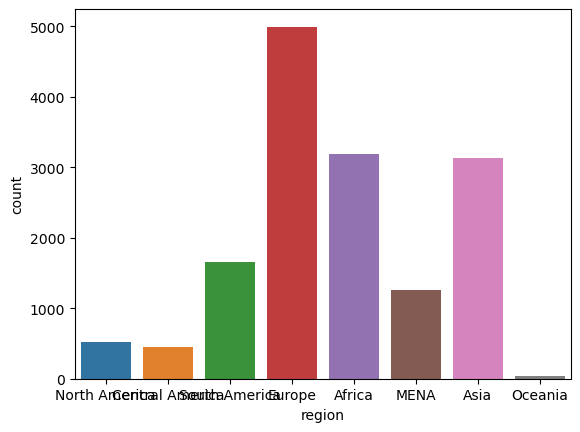

In [255]:
sns.countplot(x= "region", data=df)
plt.show()


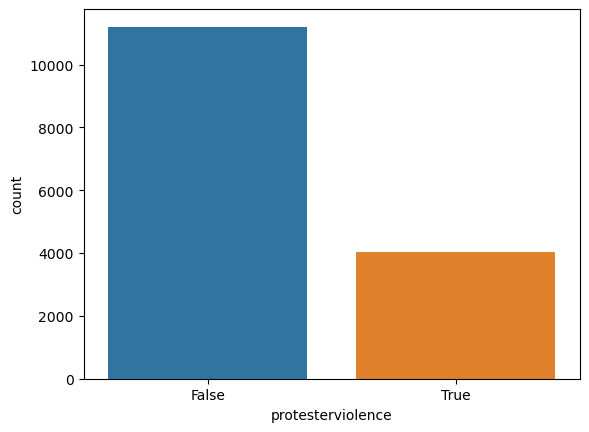

In [202]:
sns.countplot(x= "protesterviolence", data=df)
plt.show()


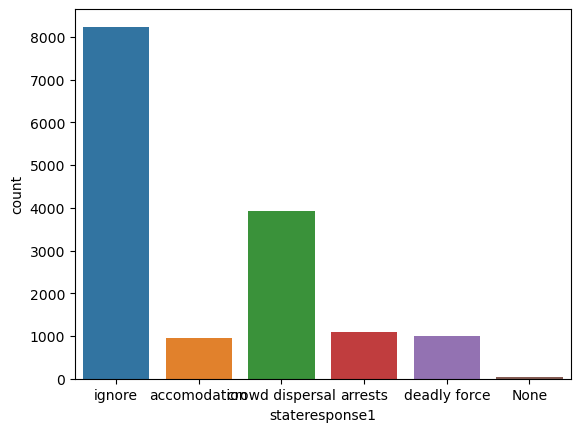

In [203]:
sns.countplot(x= "stateresponse1", data=df)
plt.show()

In [242]:
df['stateresponse1'].value_counts(dropna=False)

stateresponse1
ignore             8239
crowd dispersal    3935
arrests            1088
deadly force        990
accomodation        956
None                 31
Name: count, dtype: int64

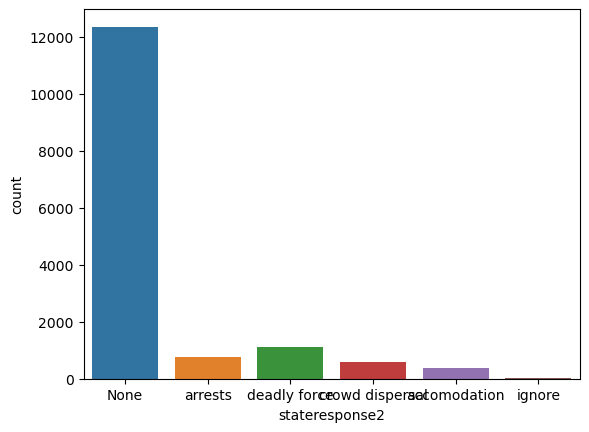

In [205]:
sns.countplot(x= "stateresponse2", data=df)
plt.show()

In [206]:
df['stateresponse2'].value_counts(dropna=False)

stateresponse2
None               12351
deadly force        1114
arrests              764
crowd dispersal      585
accomodation         389
ignore                36
Name: count, dtype: int64

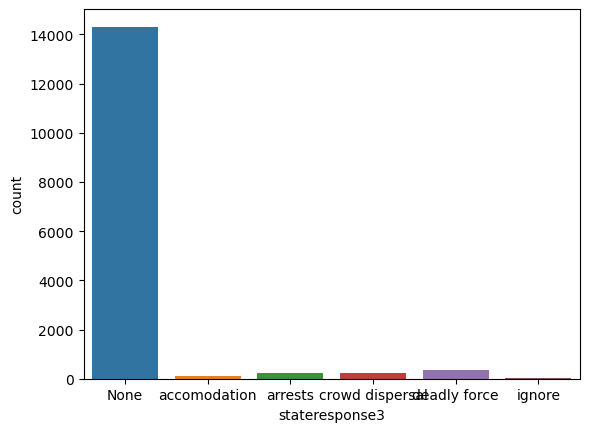

In [207]:
sns.countplot(x= "stateresponse3", data=df)
plt.show()

C:\Users\Abel_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



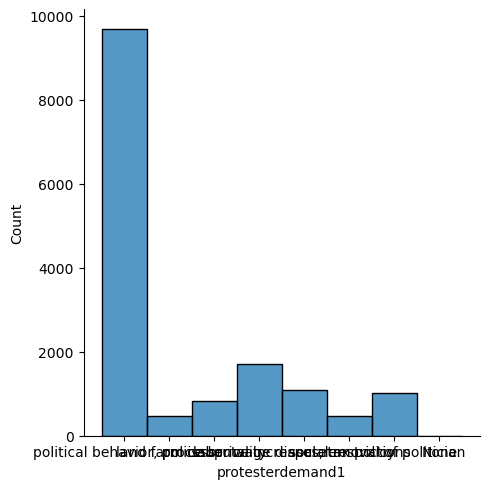

In [208]:
sns.displot(x= "protesterdemand1", data=df)
plt.show()

In [209]:
df['protesterdemand1'].value_counts(dropna=False)

protesterdemand1
political behavior, process    9680
labor wage dispute             1710
price increases, tax policy    1087
removal of politician          1011
police brutality                825
land farm issue                 467
social restrictions             458
None                              1
Name: count, dtype: int64

In [210]:
top_countries_by_protest = df.groupby('country')['protest'].count().sort_values(ascending=False).head(10)
top_countries_by_protest

country
United Kingdom    578
France            547
Ireland           431
Germany           364
Kenya             350
South Korea       346
Bangladesh        340
China             319
Venezuela         318
Greece            315
Name: protest, dtype: int64

In [211]:
# demands per country
top_countries = df['country'].value_counts().head(10).index.tolist()
top_countries_df = df[df['country'].isin(top_countries)]

demands_df = top_countries_df.melt(id_vars=['country'], 
                                   value_vars=['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4'],
                                   var_name='demand_type', 
                                   value_name='demand')

demands_df = demands_df[~demands_df['demand'].isin([np.nan, 'None'])]

most_common_demands = demands_df.groupby(['country', 'demand'])['demand'].count().sort_values(ascending=False).reset_index(name='count')

most_common_demands = most_common_demands.groupby('country').head(1)
most_common_demands


,country,demand,count
0,United Kingdom,"political behavior, process",464
1,France,"political behavior, process",346
2,Ireland,"political behavior, process",307
3,Germany,"political behavior, process",280
4,Greece,"political behavior, process",277
5,Venezuela,"political behavior, process",230
6,South Korea,"political behavior, process",230
8,China,"political behavior, process",222
9,Bangladesh,"political behavior, process",218
10,Kenya,"political behavior, process",200


In [212]:
# response vs protester violence
responses_df = df[~df[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 
                       'stateresponse5', 'stateresponse6', 'stateresponse7']].isin(['None', 'Unknown']).any(axis=1)]


responses_df = responses_df.melt(id_vars=['protesterviolence'], 
                                 value_vars=['stateresponse1', 'stateresponse2', 'stateresponse3', 
                                             'stateresponse4', 'stateresponse5', 'stateresponse6', 
                                             'stateresponse7'],
                                 var_name='response_type', 
                                 value_name='response')

# grouping by 'protesterviolence' and 'response', and counting the occurrences
violence_response = responses_df.groupby(['protesterviolence', 'response'])['response'].count().reset_index(name='count')

# sorted results
violence_response_sorted = violence_response.sort_values(by=['protesterviolence', 'count'], ascending=[True, False])
violence_response_sorted

,protesterviolence,response,count
2,False,crowd dispersal,3
0,False,accomodation,2
1,False,arrests,1
3,False,ignore,1
7,True,deadly force,8
4,True,accomodation,7
6,True,crowd dispersal,6
5,True,arrests,4
8,True,ignore,3


In [213]:
df.sort_values(by="protestnumber",ascending=False)

,id,country,ccode,year,region,protest,protestnumber,start_date,end_date,protesterviolence,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
10391,5012015143,Kenya,501,2015,Africa,1,143,2015-12-14,2015-12-14,False,...,None,ignore,None,None,None,None,None,None,kisumu protest raila s eurobond summons. the s...,hundreds of kisumu residents and odm supporter...
10390,5012015142,Kenya,501,2015,Africa,1,142,2015-12-11,2015-12-11,False,...,None,accomodation,None,None,None,None,None,None,widows protest in nakuru over funds. the star ...,business yesterday came to a standstill in ker...
10389,5012015141,Kenya,501,2015,Africa,1,141,2015-12-07,2015-12-07,False,...,None,crowd dispersal,None,None,None,None,None,None,athi river residents demand sgr payout. the st...,more than 500 residents of kwa mang eli villag...
10388,5012015140,Kenya,501,2015,Africa,1,140,2015-12-04,2015-12-04,False,...,None,ignore,None,None,None,None,None,None,kang ata leads drive to slash water prices. th...,kiharu mp irungu kang ata has accused murang a...
10387,5012015139,Kenya,501,2015,Africa,1,139,2015-12-04,2015-12-04,False,...,None,accomodation,None,None,None,None,None,None,gachie residents protest over rise in crime. t...,hundreds of gachie residents from kiambaa cons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,4821993001,Central African Republic,482,1993,Africa,1,1,1993-05-15,1993-05-15,True,...,None,accomodation,None,None,None,None,None,None,1. troops ring presidential palace to demand b...,troops of the presidential guard ringed the pr...
9749,4821992001,Central African Republic,482,1992,Africa,1,1,1992-08-01,1992-08-01,False,...,None,crowd dispersal,deadly force,arrests,deadly force,None,None,None,1. security forces beat opposition leader to d...,soldiers beat an opposition leader to death wi...
9746,4821991001,Central African Republic,482,1991,Africa,1,1,1991-05-05,1991-05-05,False,...,None,ignore,None,None,None,None,None,None,"africa news summary; sunday, may 5. agence fra...",about 100 students and schoolchildren marched ...
9745,4821990001,Central African Republic,482,1990,Africa,1,1,1990-10-15,1990-10-15,True,...,None,crowd dispersal,deadly force,None,None,None,None,None,1. police fire tear gas at protesters who prom...,police fired tear gas monday at protesters who...


In [214]:
# top 10 years with the most protests
top_years_with_most_protests = df['year'].value_counts().head(10)
top_years_with_most_protests

year
2015    857
2019    814
2014    769
2016    713
2018    698
2011    688
2013    586
1990    572
2012    553
2017    541
Name: count, dtype: int64

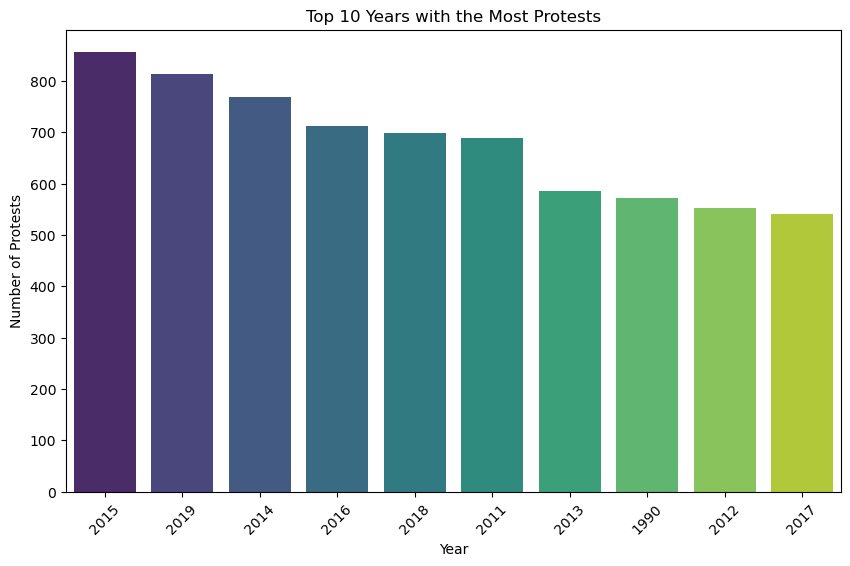

In [215]:
# series in descending order
top_years_with_most_protests = top_years_with_most_protests.sort_values(ascending=False)

# sorted data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_years_with_most_protests.index, y=top_years_with_most_protests.values, palette="viridis", order=top_years_with_most_protests.index)
ax.set_title('Top 10 Years with the Most Protests')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Protests')
plt.xticks(rotation=45)
plt.show()

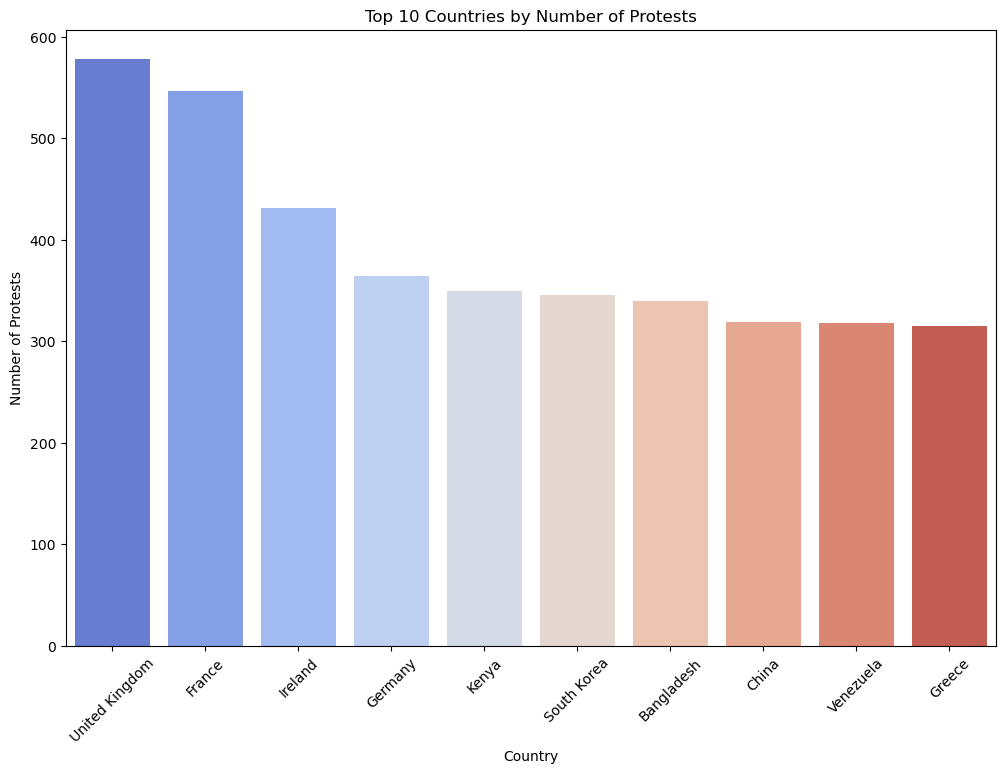

In [216]:
# top 10 countries by number of protests
top_countries_by_protest = df['country'].value_counts().head(10).sort_values(ascending=False)

# Plot the sorted data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_countries_by_protest.index, y=top_countries_by_protest.values, palette="coolwarm")
ax.set_title('Top 10 Countries by Number of Protests')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Protests')
plt.xticks(rotation=45)
plt.show()

In [217]:
!pip install plotly
import plotly.graph_objects as go

In [218]:
demand_counts = demands_df['demand'].value_counts()

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,  
      thickness=20,  
      line=dict(color="black", width=0.5),  
      label=demand_counts.index.tolist(),  
    ),
    link=dict(
      source=[0] * len(demand_counts),  
      target=list(range(1, len(demand_counts) + 1)),  
      value=demand_counts.tolist()  
    ))])

fig.update_layout(title_text="Flow of Protests to Protester Demands", font_size=10)
fig.show()

In [219]:
all_demands = pd.melt(df, value_vars=['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4'],
                      var_name='demand_type', value_name='demand')['demand']
all_demands = all_demands[all_demands != 'None']
demand_counts = all_demands.value_counts()
labels = ['All Protests'] + demand_counts.index.tolist()
sources = [0] * len(demand_counts)
targets = list(range(1, len(demand_counts) + 1))
values = demand_counts.tolist()
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels
    ),
    link=dict(
      source=sources,  
      target=targets,
      value=values
    ))])

fig.update_layout(title_text="Flow of All Protests to Specific Protester Demands", font_size=10)
fig.show()


In [282]:
all_responses = pd.melt(df, value_vars=['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7'],
                        var_name='response_type', value_name='response')['response']

all_responses = all_responses[(all_responses != 'None') & (all_responses != 'Unknown')]
response_counts = all_responses.value_counts()

labels = ['All Responses'] + response_counts.index.tolist()
sources = [0] * len(response_counts)


targets = list(range(1, len(response_counts) + 1))
values = response_counts.tolist()

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels
    ),
    link=dict(
      source=sources, 
      target=targets,
      value=values
    ))])

fig.update_layout(title_text="Flow of All Protests to Specific Government Responses", font_size=10)
fig.show()

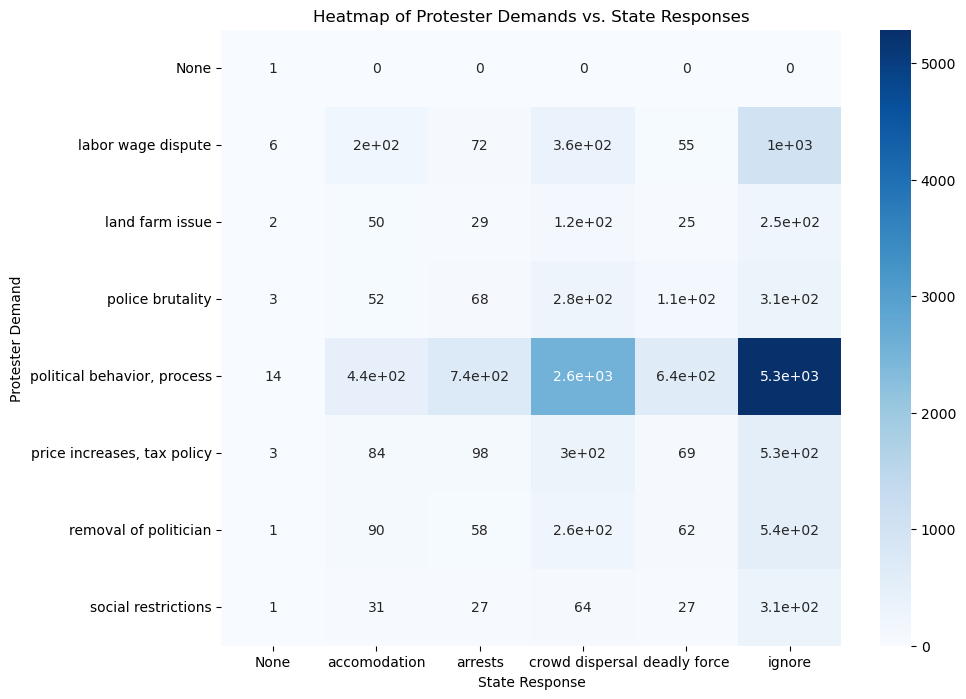

In [221]:
# combining protester demands and state responses
combined_df = df[['protesterdemand1', 'stateresponse1']].dropna()  


# visualizations
pivot_table = combined_df.pivot_table(index='protesterdemand1', columns='stateresponse1', aggfunc=len, fill_value=0)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Heatmap of Protester Demands vs. State Responses')
plt.xlabel('State Response')
plt.ylabel('Protester Demand')
plt.show()


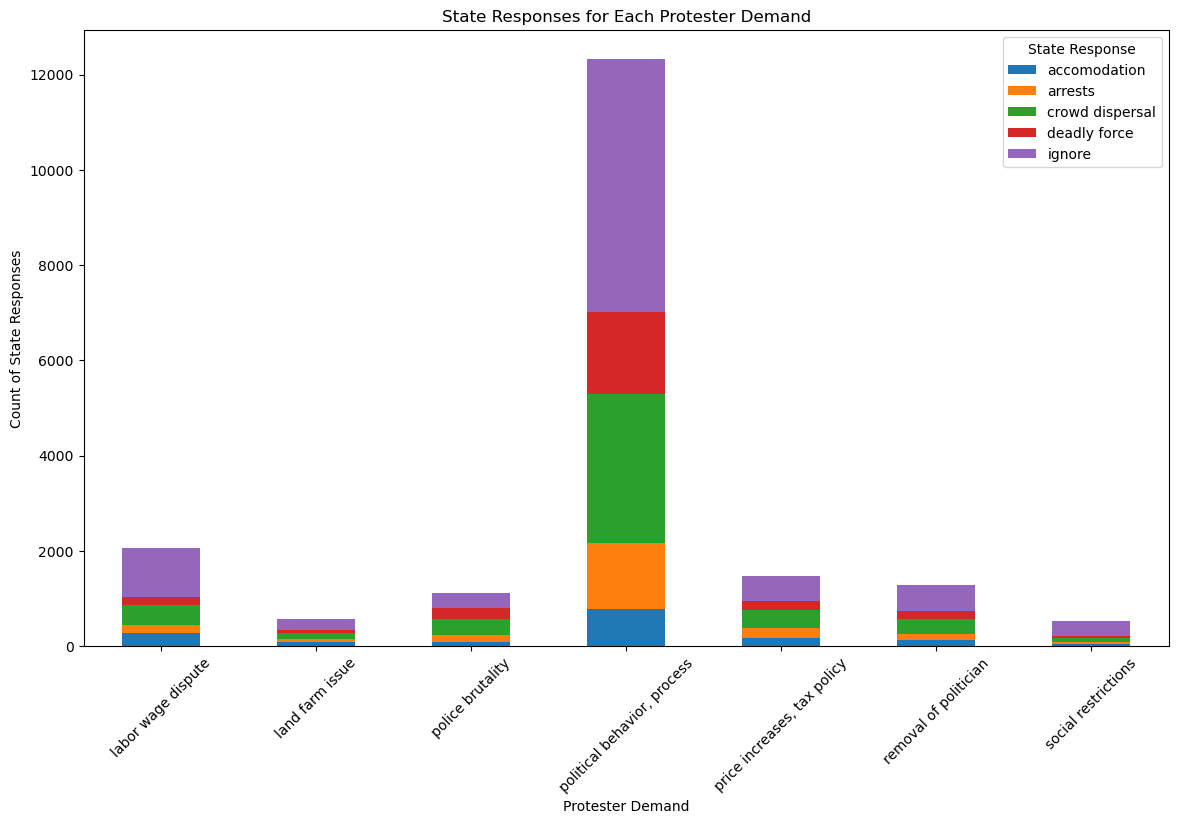

In [222]:
# occurrences of each state response for each protester demand
demand_response_counts = df.melt(id_vars=['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4'], 
                                 value_vars=['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 
                                             'stateresponse5', 'stateresponse6', 'stateresponse7'],
                                 var_name='response_order', 
                                 value_name='state_response').dropna(subset=['state_response'])

# excluding 'None'
demand_response_counts = demand_response_counts[~demand_response_counts['state_response'].isin(['None'])]

demand_response_grouped = demand_response_counts.groupby(['protesterdemand1', 'state_response']).size().reset_index(name='count')
demand_response_pivot = demand_response_grouped.pivot(index='protesterdemand1', columns='state_response', values='count').fillna(0)

# Plotting
demand_response_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('State Responses for Each Protester Demand')
plt.xlabel('Protester Demand')
plt.ylabel('Count of State Responses')
plt.legend(title='State Response')
plt.xticks(rotation=45)
plt.show()


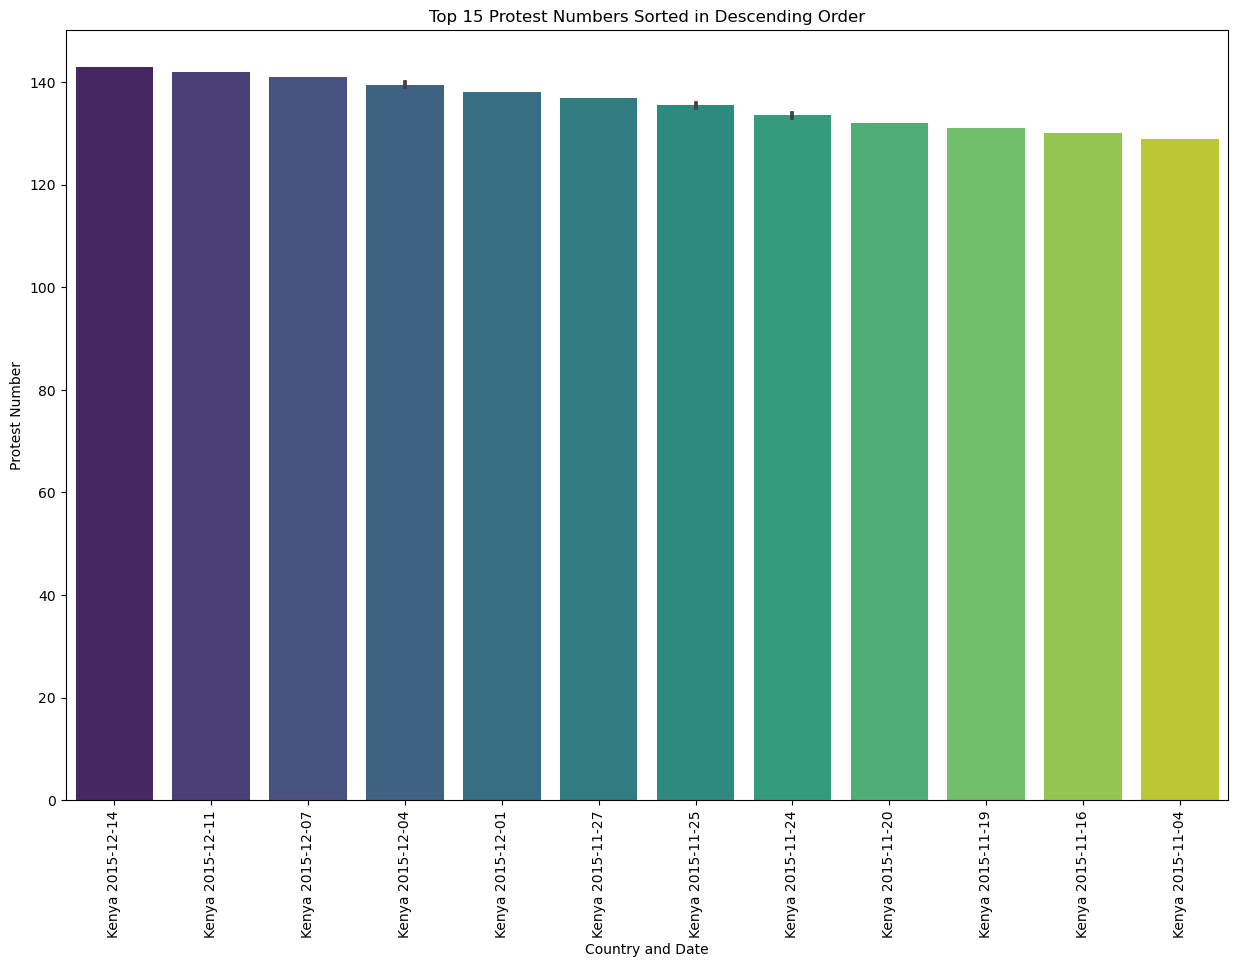

In [226]:
# 'protestnumber' in descending order and take the top 15 for plotting
top_protests = df.sort_values('protestnumber', ascending=False).head(15)

# new column combining 'country' and 'start_date'
top_protests['country_date'] = top_protests['country'] + ' ' + top_protests['start_date'].dt.strftime('%Y-%m-%d')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='country_date', y='protestnumber', data=top_protests, palette="viridis")
plt.title('Top 15 Protest Numbers Sorted in Descending Order')
plt.xlabel('Country and Date')
plt.ylabel('Protest Number')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()


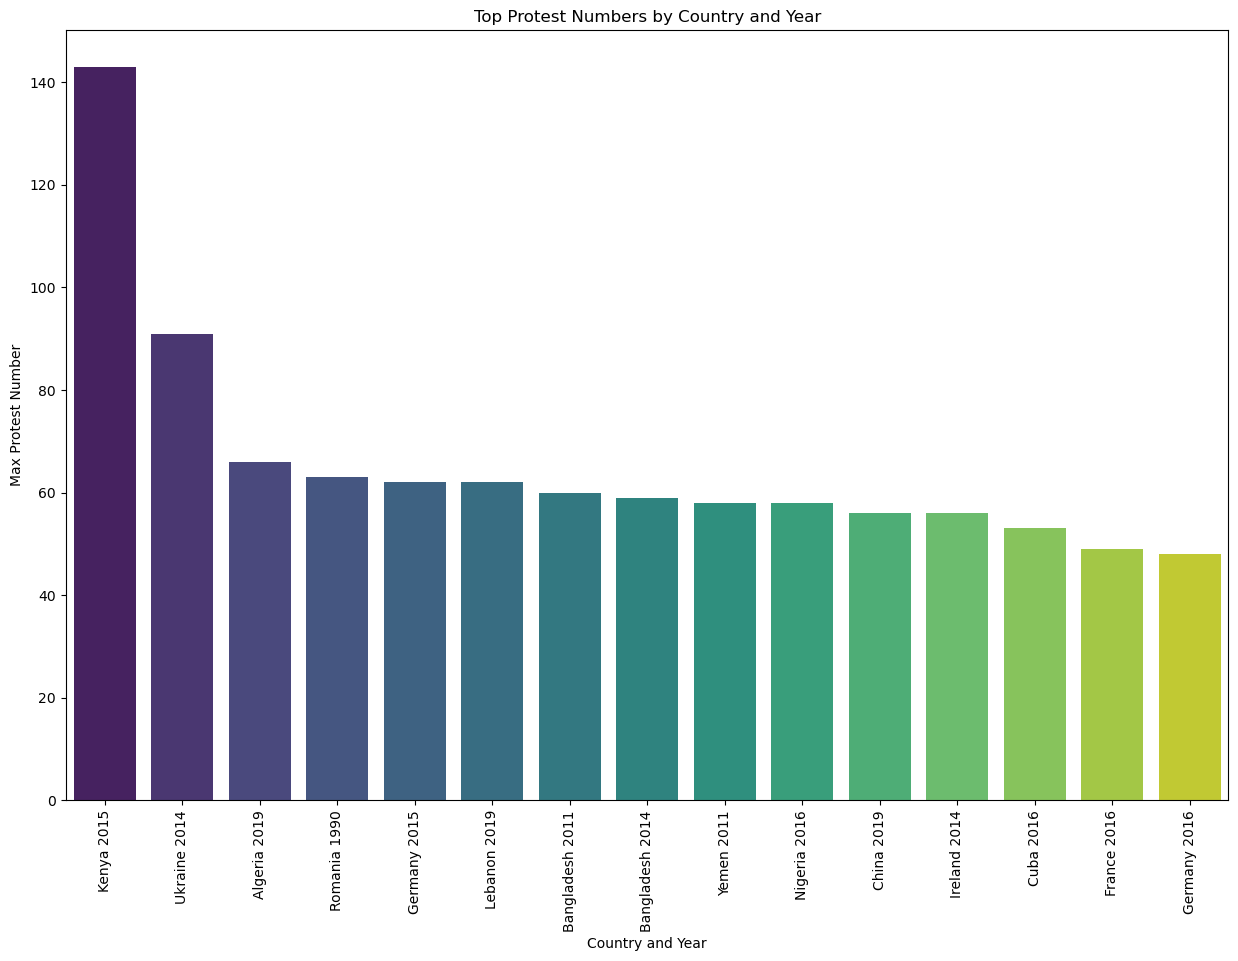

In [227]:
max_protests_per_country_year = df.groupby(['country', 'year'])['protestnumber'].max().reset_index()
top_protests_by_country_year = max_protests_per_country_year.sort_values('protestnumber', ascending=False).head(15)
top_protests_by_country_year['country_year'] = top_protests_by_country_year['country'] + " " + top_protests_by_country_year['year'].astype(str)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='country_year', y='protestnumber', data=top_protests_by_country_year, palette="viridis")
plt.title('Top Protest Numbers by Country and Year')
plt.xlabel('Country and Year')
plt.ylabel('Max Protest Number')
plt.xticks(rotation=90) 
plt.show()


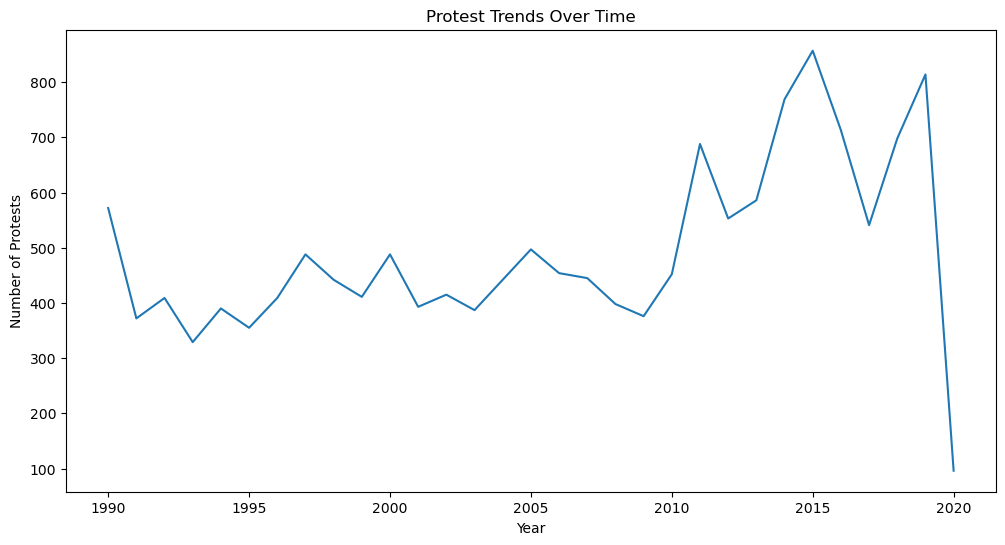

In [229]:

df['year'] = df['start_date'].dt.year
trends = df.groupby('year').size()

plt.figure(figsize=(12,6))
trends.plot(title='Protest Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.show()


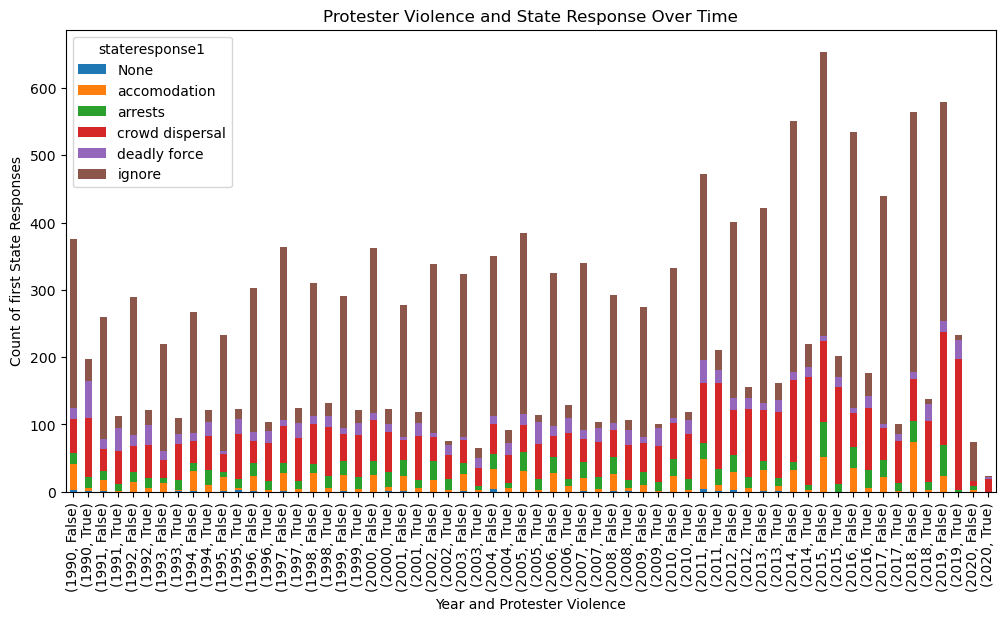

In [233]:
violence_response = df.groupby(['year', 'protesterviolence'])['stateresponse1'].value_counts().unstack()

violence_response.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Protester Violence and State Response Over Time')
plt.xlabel('Year and Protester Violence')
plt.ylabel('Count of first State Responses')
plt.show()


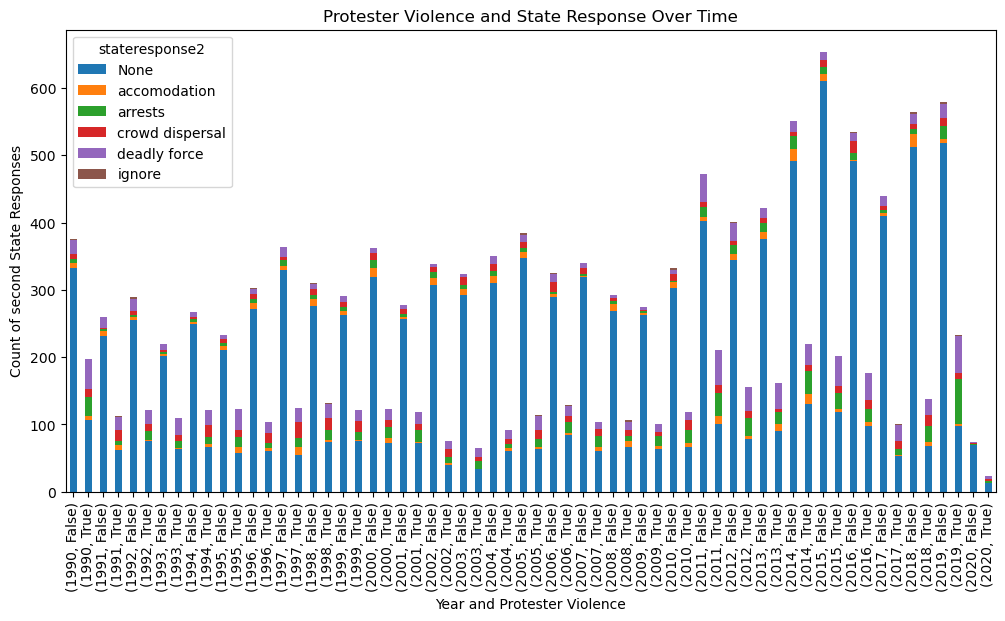

In [234]:
violence_response = df.groupby(['year', 'protesterviolence'])['stateresponse2'].value_counts().unstack()

violence_response.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Protester Violence and State Response Over Time')
plt.xlabel('Year and Protester Violence')
plt.ylabel('Count of second State Responses')
plt.show()


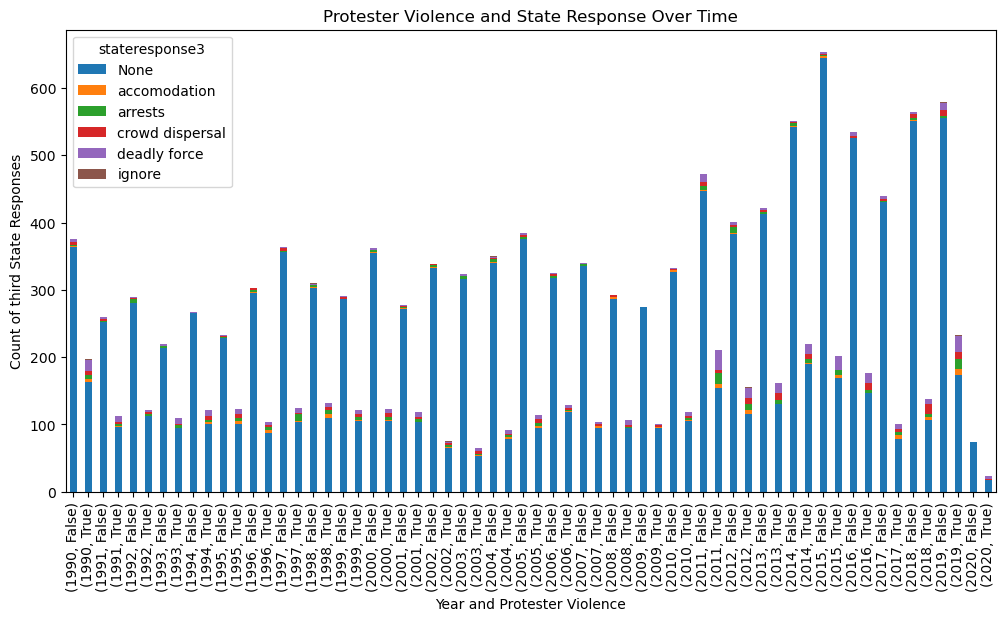

In [235]:
violence_response = df.groupby(['year', 'protesterviolence'])['stateresponse3'].value_counts().unstack()

violence_response.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Protester Violence and State Response Over Time')
plt.xlabel('Year and Protester Violence')
plt.ylabel('Count of third State Responses')
plt.show()


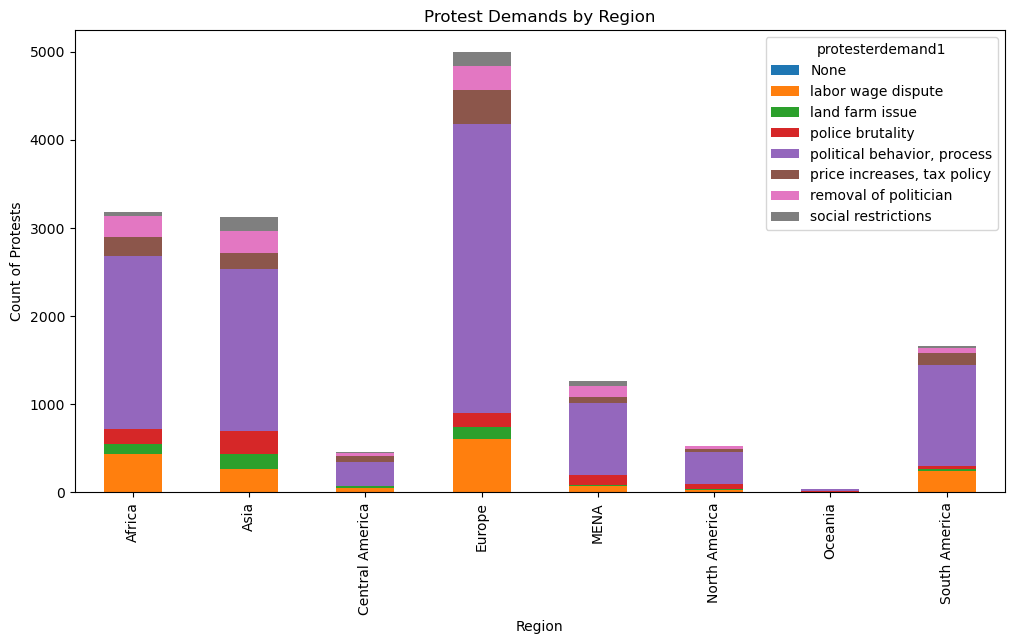

In [237]:
# Breakdown of protest demands by region
region_demand = df.groupby(['region', 'protesterdemand1']).size().unstack().fillna(0)

region_demand.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Protest Demands by Region')
plt.xlabel('Region')
plt.ylabel('Count of Protests')
plt.show()

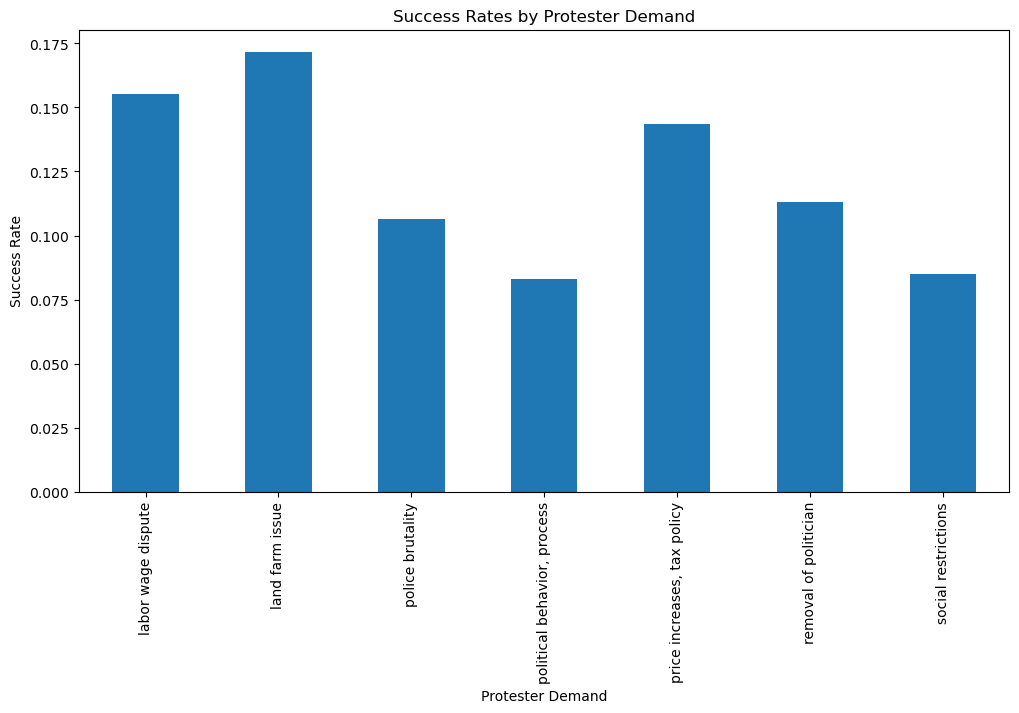

In [243]:
# all columns related to state responses
state_response_columns = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 
                          'stateresponse5', 'stateresponse6', 'stateresponse7']

#'accommodation' in any of the response columns
df['demand_met'] = df[state_response_columns].apply(lambda x: 'accomodation' in x.values, axis=1)

# success rates for each type of demand
protester_demand_columns = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']
success_rates = df[df['demand_met'] == True][protester_demand_columns].apply(pd.Series.value_counts).sum(axis=1) / df[protester_demand_columns].apply(pd.Series.value_counts).sum(axis=1)

# Plotting
success_rates.drop(index='None').plot(kind='bar', figsize=(12,6))  # Exclude 'None' from the plot
plt.title('Success Rates by Protester Demand')
plt.xlabel('Protester Demand')
plt.ylabel('Success Rate')
plt.show()


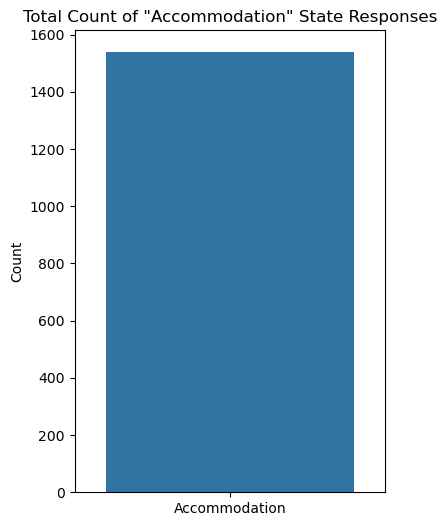

In [244]:
accommodation_count = df.filter(like='stateresponse').apply(lambda x: x == 'accomodation').sum().sum()

# total count of "accommodation" as bar chart
plt.figure(figsize=(4, 6))
sns.barplot(x=['Accommodation'], y=[accommodation_count])
plt.title('Total Count of "Accommodation" State Responses')
plt.ylabel('Count')
plt.show()


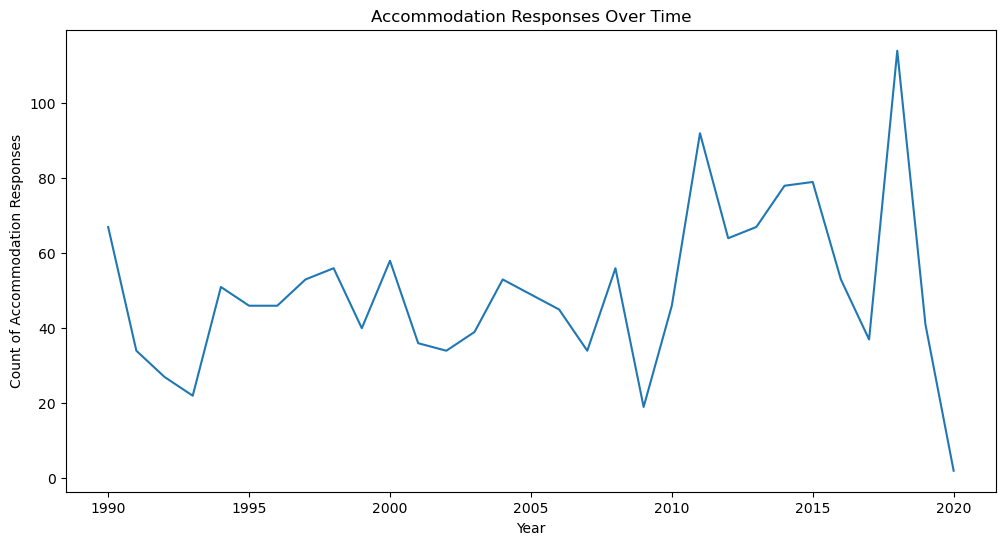

In [245]:
# True indicates 'accommodation'
accommodation_df = df.filter(like='stateresponse').apply(lambda x: x == 'accomodation')


accommodation_df['year'] = df['year']
accommodation_by_year = accommodation_df.groupby('year').sum().sum(axis=1)

# Plotting
plt.figure(figsize=(12, 6))
accommodation_by_year.plot(title='Accommodation Responses Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Accommodation Responses')
plt.show()

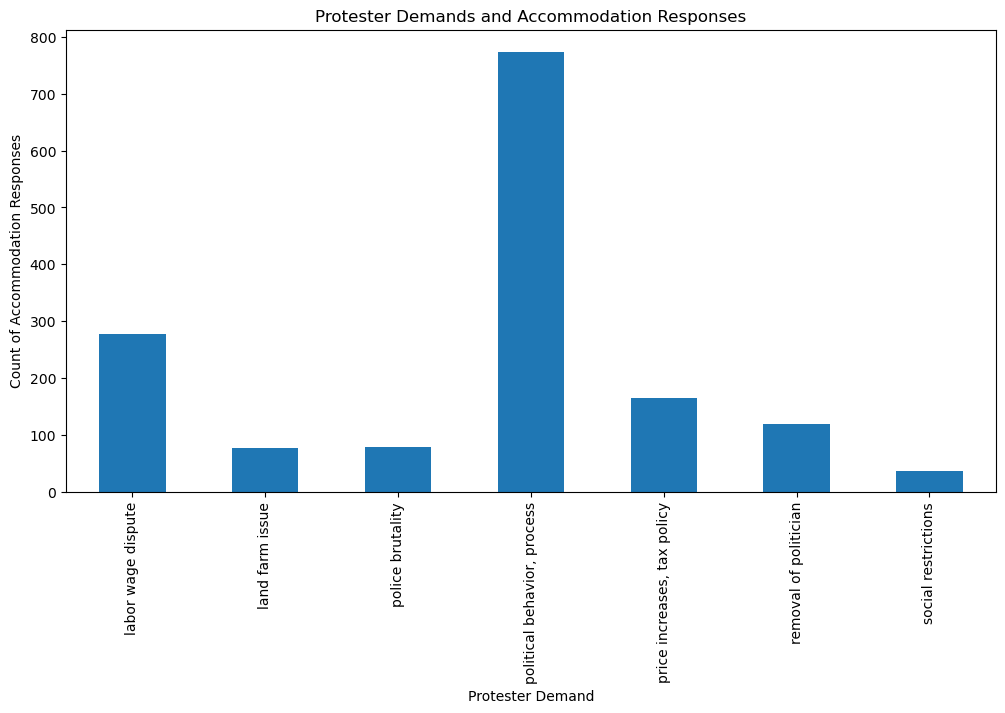

In [247]:
# boolean series for accommodation responses
is_accommodation = df.filter(like='stateresponse').apply(lambda x: x == 'accomodation').any(axis=1)

# Crosstab between protester demands and accommodation
accommodation_demands = pd.crosstab(df[is_accommodation]['protesterdemand1'], columns='accommodation')

# Plotting
accommodation_demands.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Protester Demands and Accommodation Responses')
plt.xlabel('Protester Demand')
plt.ylabel('Count of Accommodation Responses')
plt.show()

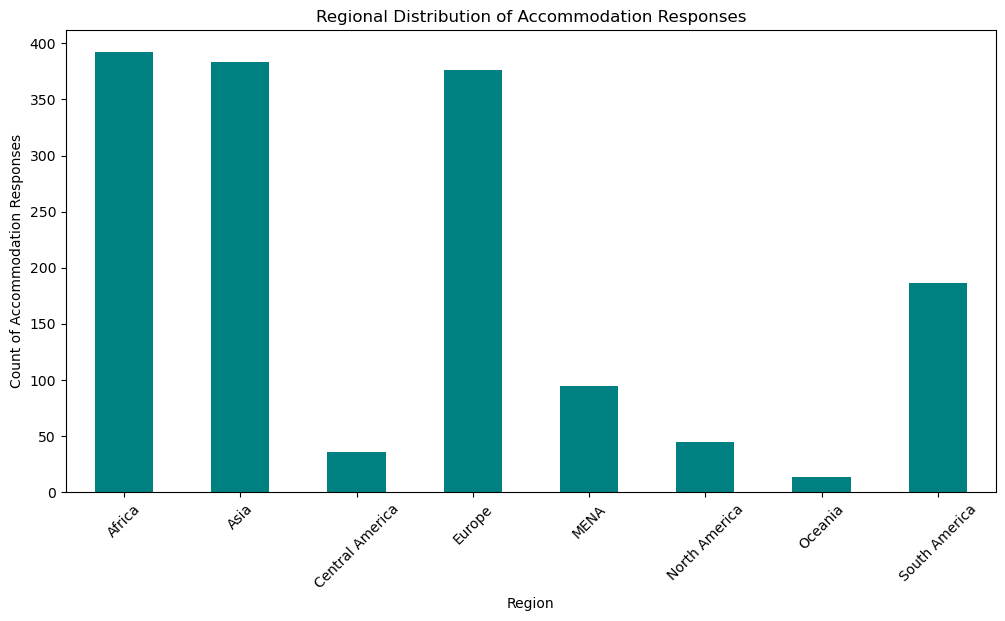

In [248]:
# number of 'accommodation' by region
accommodation_by_region = df[is_accommodation].groupby('region').size()

# Plotting
plt.figure(figsize=(12, 6))
accommodation_by_region.plot(kind='bar', color='teal')
plt.title('Regional Distribution of Accommodation Responses')
plt.xlabel('Region')
plt.ylabel('Count of Accommodation Responses')
plt.xticks(rotation=45)
plt.show()


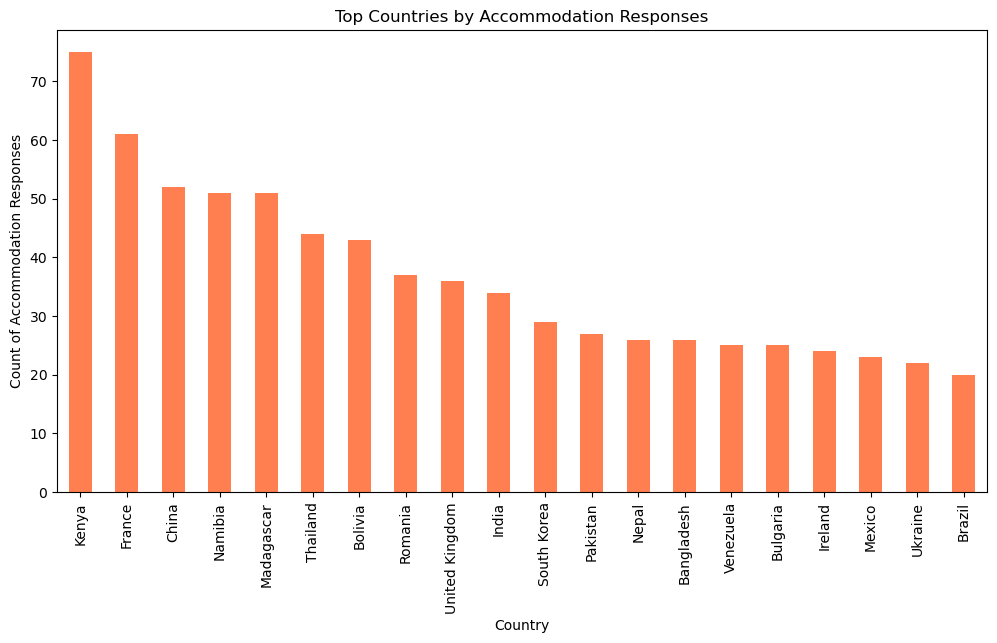

In [249]:
# number of 'accommodation' by country
accommodation_by_country = df[is_accommodation].groupby('country').size().sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
accommodation_by_country.plot(kind='bar', color='coral')
plt.title('Top Countries by Accommodation Responses')
plt.xlabel('Country')
plt.ylabel('Count of Accommodation Responses')
plt.xticks(rotation=90)
plt.show()


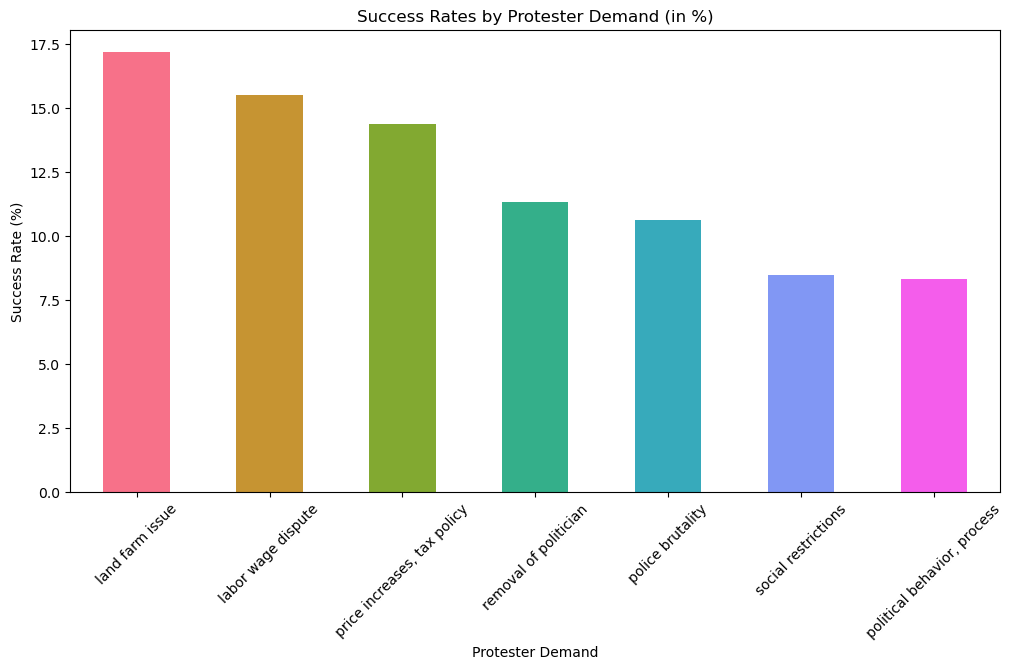

In [251]:
# success rate to percentage and sort values in descending order
success_rates_percent = (success_rates * 100).sort_values(ascending=False)  # Convert to percentage and sort


success_rates_percent_filtered = success_rates_percent.drop(index='None')
colors = sns.color_palette('husl', n_colors=len(success_rates_percent_filtered))

# Plotting
success_rates_percent_filtered.plot(kind='bar', figsize=(12,6), color=colors)
plt.title('Success Rates by Protester Demand (in %)')
plt.xlabel('Protester Demand')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


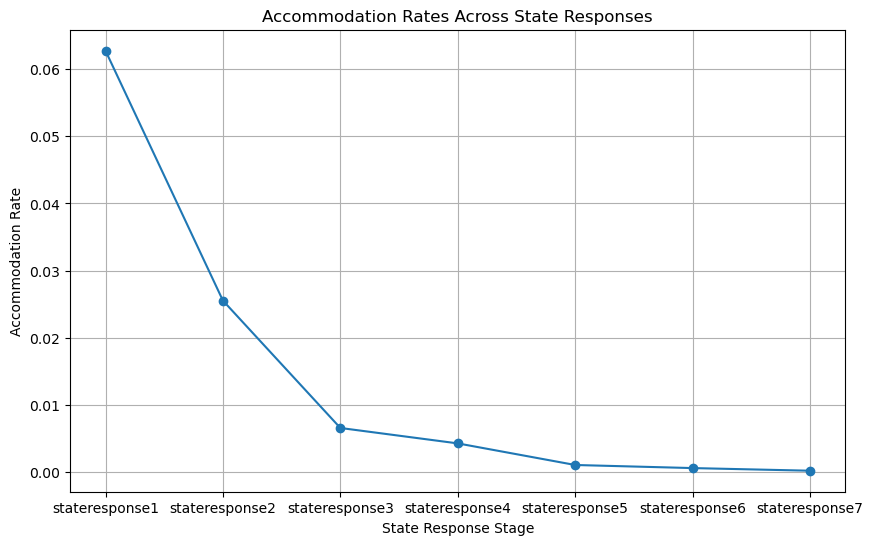

In [258]:
# list to hold accommodation rates for each response
accommodation_rates = []

# List of state response columns
state_response_columns = ['stateresponse1', 'stateresponse2', 'stateresponse3', 
                          'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7']

# accommodation rate for each state response column
for column in state_response_columns:    
    accommodation_count = df[column].value_counts().get('accomodation', 0)    
    total_responses = df[column].notnull().sum()    
    rate = accommodation_count / total_responses if total_responses else 0
    accommodation_rates.append(rate)


accommodation_series = pd.Series(accommodation_rates, index=state_response_columns)

# Plotting
accommodation_series.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Accommodation Rates Across State Responses')
plt.xlabel('State Response Stage')
plt.ylabel('Accommodation Rate')
plt.grid(True)
plt.show()


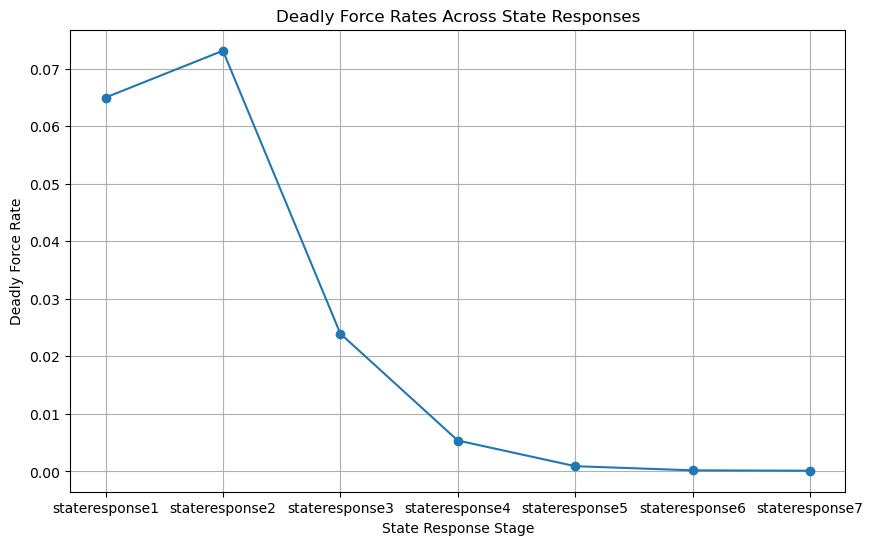

In [259]:
# list to hold deadly force rates for each response
deadly_force_rates = []

# List of state response columns
state_response_columns = ['stateresponse1', 'stateresponse2', 'stateresponse3', 
                          'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7']


for column in state_response_columns:
    
    deadly_force_count = df[column].value_counts().get('deadly force', 0)
    total_responses = df[column].notnull().sum()
    rate = deadly_force_count / total_responses if total_responses else 0
    deadly_force_rates.append(rate)


deadly_force_series = pd.Series(deadly_force_rates, index=state_response_columns)

# Plotting
deadly_force_series.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Deadly Force Rates Across State Responses')
plt.xlabel('State Response Stage')
plt.ylabel('Deadly Force Rate')
plt.grid(True)
plt.show()


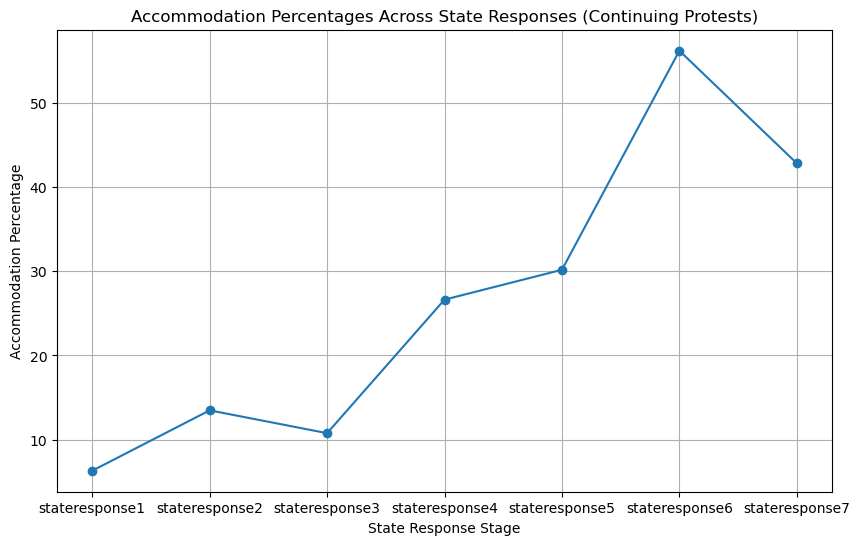

In [265]:
# list to hold accommodation rates for each response
continuing_accommodation_rates = []

# list of state response columns
state_response_columns = ['stateresponse1', 'stateresponse2', 'stateresponse3', 
                          'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7']

for column in state_response_columns:
    continuing_protests = df[df[column] != 'None']
    accommodation_count = continuing_protests[column].value_counts().get('accomodation', 0)
    total_continuing_responses = (continuing_protests[column] != 'None').sum()
    rate = accommodation_count / total_continuing_responses if total_continuing_responses else 0
    continuing_accommodation_rates.append(rate)

continuing_accommodation_percentages = continuing_accommodation_series * 100

# Plotting
continuing_accommodation_percentages.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Accommodation Percentages Across State Responses (Continuing Protests)')
plt.xlabel('State Response Stage')
plt.ylabel('Accommodation Percentage')
plt.grid(True)
plt.show()

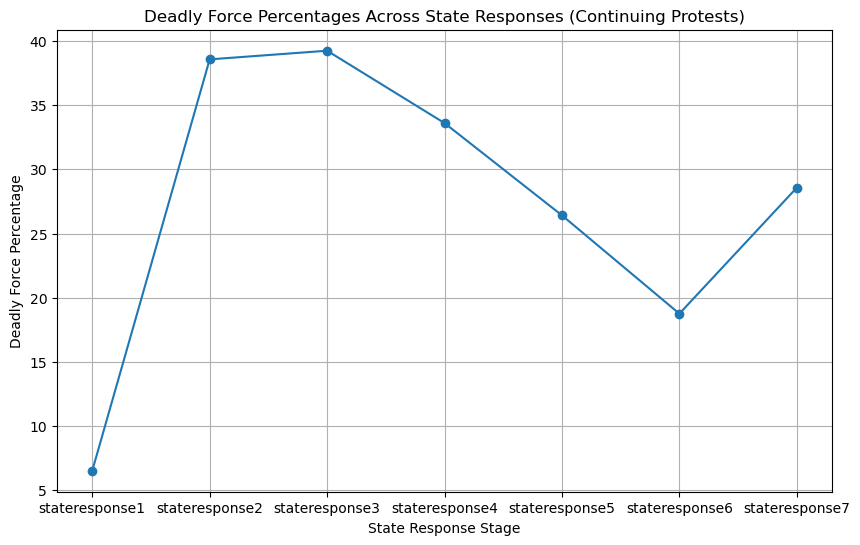

In [262]:
continuing_deadly_force_rates = []

for column in state_response_columns:
    continuing_protests = df[df[column] != 'None']
    deadly_force_count = continuing_protests[column].value_counts().get('deadly force', 0)
    total_continuing_responses = (continuing_protests[column] != 'None').sum()
    rate = deadly_force_count / total_continuing_responses if total_continuing_responses else 0
    continuing_deadly_force_rates.append(rate)

continuing_deadly_force_percentages = continuing_deadly_force_series * 100

# Plotting
continuing_deadly_force_percentages.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Deadly Force Percentages Across State Responses (Continuing Protests)')
plt.xlabel('State Response Stage')
plt.ylabel('Deadly Force Percentage')
plt.grid(True)
plt.show()

In [281]:
import plotly.express as px

protest_count_df = df.groupby('country')['protest'].sum().reset_index()

fig = px.choropleth(protest_count_df,
                    locations='country',  
                    locationmode='country names', 
                    color='protest',  
                    hover_name='country',  
                    color_continuous_scale=px.colors.sequential.Plasma,  
                    title='Total Number of Protests by Country')

fig.update_layout(autosize=True)
fig.show()


In [270]:
# unique country names
unique_countries = df['country'].unique()

# array to a list for visibility
unique_countries_list = unique_countries.tolist()

print("Unique countries in the dataframe:")
print(*unique_countries_list, sep='\n')


Unique countries in the dataframe:
Canada
Cuba
Haiti
Dominican Republic
Jamaica
Mexico
Guatemala
Honduras
El Salvador
Nicaragua
Costa Rica
Panama
Colombia
Venezuela
Guyana
Suriname
Ecuador
Peru
Brazil
Bolivia
Paraguay
Chile
Argentina
Uruguay
United Kingdom
Ireland
Netherlands
Belgium
Luxembourg
France
Switzerland
Spain
Portugal
Germany
Germany West
Germany East
Poland
Austria
Hungary
Czechoslovakia
Czech Republic
Slovak Republic
Italy
Albania
Kosovo
Serbia
Macedonia
Croatia
Yugoslavia
Bosnia
Serbia and Montenegro
Montenegro
Slovenia
Greece
Cyprus
Bulgaria
Moldova
Romania
USSR
Russia
Estonia
Latvia
Lithuania
Ukraine
Belarus
Armenia
Georgia
Azerbaijan
Finland
Sweden
Norway
Denmark
Cape Verde
Guinea-Bissau
Equatorial Guinea
Gambia
Mali
Senegal
Benin
Mauritania
Niger
Ivory Coast
Guinea
Burkina Faso
Liberia
Sierra Leone
Ghana
Togo
Cameroon
Nigeria
Gabon
Central African Republic
Chad
Congo Brazzaville
Congo Kinshasa
Uganda
Kenya
Tanzania
Burundi
Rwanda
Somalia
Djibouti
South Sudan
Ethiopia
E

In [278]:
from sqlalchemy import create_engine
import pandas as pd
from getpass import getpass

password = getpass("Enter your MySQL password: ")
connection_string = 'mysql+pymysql://root:' + password + '@localhost/massprotest_abel'
engine = create_engine(connection_string)

df.to_sql('ultimate_massmovilization_sql_version_abel', con=engine, if_exists='replace', index=False)

print("The DataFrame has been successfully saved to the SQL table.")


Enter your MySQL password: ········
The DataFrame has been successfully saved to the SQL table.


In [279]:
password = getpass("Enter your MySQL password: ")
connection_string = 'mysql+pymysql://root:' + password + '@localhost/massprotest_abel'
engine = create_engine(connection_string)

dfsql = pd.read_sql_table('ultimate_massmovilization_sql_version_abel', con=engine)
dfsql

Enter your MySQL password: ········


,id,country,ccode,year,region,protest,protestnumber,start_date,end_date,protesterviolence,...,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,demand_met
0,201990001,Canada,20,1990,North America,1,1,1990-01-15,1990-01-15,0,...,ignore,None,None,None,None,None,None,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,0
1,201990002,Canada,20,1990,North America,1,2,1990-06-25,1990-06-25,0,...,ignore,None,None,None,None,None,None,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,0
2,201990003,Canada,20,1990,North America,1,3,1990-07-01,1990-07-01,0,...,ignore,None,None,None,None,None,None,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",0
3,201990004,Canada,20,1990,North America,1,4,1990-07-12,1990-09-06,1,...,accomodation,None,None,None,None,None,None,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,1
4,201990005,Canada,20,1990,North America,1,5,1990-08-14,1990-08-15,1,...,crowd dispersal,arrests,accomodation,None,None,None,None,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15234,9102014001,Papua New Guinea,910,2014,Oceania,1,1,2014-02-16,2014-02-18,1,...,crowd dispersal,deadly force,None,None,None,None,None,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...,0
15235,9102016001,Papua New Guinea,910,2016,Oceania,1,1,2016-05-15,2016-06-09,1,...,deadly force,deadly force,crowd dispersal,None,None,None,None,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...,0
15236,9102017001,Papua New Guinea,910,2017,Oceania,1,1,2017-06-15,2017-06-15,0,...,accomodation,None,None,None,None,None,None,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...,1
15237,9102017002,Papua New Guinea,910,2017,Oceania,1,2,2017-07-15,2017-07-15,1,...,crowd dispersal,None,None,None,None,None,None,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...,0


In [ ]:
# new CSV file with clean data
df.to_csv('Abel_Massprotest_Ultimate.csv', index=False)  #cell has been executed and then restarted

In [284]:
#Hypothesis Testing

from scipy import stats

#My hypothesis is that there more you protest, the more possible it becomes to receive a deadly response from the state

#total number of protests and instances of deadly force by country and year
protest_agg = df.groupby(['country', 'year'])['protest'].sum().reset_index()
deadly_force_agg = df.groupby(['country', 'year'])['stateresponse1'].apply(lambda x: (x == 'deadly force').sum()).reset_index()

# Merging data on 'country' and 'year'
merged_data = pd.merge(protest_agg, deadly_force_agg, on=['country', 'year'])

# Spearman's correlation
spearman_corr = stats.spearmanr(merged_data['protest'], merged_data['stateresponse1'])

print(f"Spearman correlation coefficient: {spearman_corr.correlation}")
print(f"P-value: {spearman_corr.pvalue}")

# Interpretation of the results (with text strings)
if spearman_corr.pvalue < 0.05:
    print("The hypothesis is correct, there is a significant relationship between the number of protests and the use of deadly force.")
else:
    print("The hypothesis is incorrect, there is no significant relationship between the number of protests and the use of deadly force.")


Spearman correlation coefficient: 0.2577857732427985
P-value: 2.6250134735649546e-46
The hypothesis is correct, there is a significant relationship between the number of protests and the use of deadly force.
